# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Student 1]([link](https://github.com/username1))
- [Student 2]([link](https://github.com/username2))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [ ]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [55]:
import numpy as np
import matplotlib.pyplot as plt

rgn = np.random.default_rng(seed=42)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

Équation de la droite ou résultat : (0.4152976695062606, -0.9266128524800252)


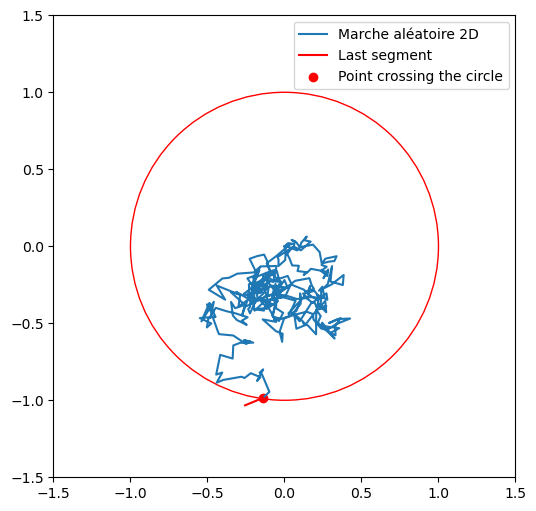

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de mouvement brownien avec deux conditions d'arrêt
def brownian_motion(niter, x0, step, rng):
    x = [x0[0]]  # Liste pour stocker les coordonnées x
    y = [x0[1]]  # Liste pour stocker les coordonnées y
    n = 0

    # La boucle continue tant que le nombre d'itérations est inférieur à niter
    # et que la distance à l'origine est inférieure à 1
    while n < niter and np.sqrt(x[-1]**2 + y[-1]**2) < 1:
        x.append(x[-1] + rng.normal(0, step))  # Déplacement aléatoire en x
        y.append(y[-1] + rng.normal(0, step))  # Déplacement aléatoire en y
        n += 1

    # Vérifier si le dernier point a dépassé le cercle de rayon 1
    if np.sqrt(x[-1]**2 + y[-1]**2) >= 1:
        if x[-1] != x[-2]:  # Cas où la droite n'est pas verticale
            # Calcul de la pente m et de l'ordonnée à l'origine b
            m = (y[-1] - y[-2]) / (x[-1] - x[-2])
            b = y[-1] - m * x[-1]
            return x, y, (m, b)
        else:  # Cas où la droite est verticale (x[-1] == x[-2])
            return x, y, "Droite verticale, x = " + str(x[-1])

    return x, y, None  # Si la trajectoire ne dépasse pas le cercle


# Fonction pour tracer la trajectoire et le dernier segment
def plot_brownian_motion(niter, x0, step):
    # Générateur aléatoire
    rng = np.random.default_rng(seed=42)

    # Appel de la fonction brownian_motion
    x_vals, y_vals, equation = brownian_motion(niter, x0, step, rng)

    # Afficher l'équation ou le message associé
    print("Équation de la droite ou résultat :", equation)

    # Création de la figure
    fig, ax = plt.subplots(figsize=(6, 6))

    # Tracé de la trajectoire
    ax.plot(x_vals[:-1], y_vals[:-1], label='Marche aléatoire 2D')

    # Si la particule dépasse le cercle, tracer le dernier segment en rouge
    if np.sqrt(x_vals[-1]**2 + y_vals[-1]**2) >= 1:
        ax.plot(x_vals[-2:], y_vals[-2:], 'r', label='Last segment')
        ax.scatter(x_vals[-2], y_vals[-2], color='r', label='Point crossing the circle')

    # Ajout du cercle de rayon 1
    circle = plt.Circle((0, 0), 1, color='r', fill=False)
    ax.add_artist(circle)

    # Ajustement des proportions et affichage
    ax.set_aspect('equal')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    plt.legend()
    plt.show()


# Exemple d'utilisation de la fonction
niter = 1000  # Nombre d'itérations maximum
x0 = (0, 0)   # Point de départ
step = 0.05   # Taille du pas

# Appel à la fonction de traçage
plot_brownian_motion(niter, x0, step)


3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

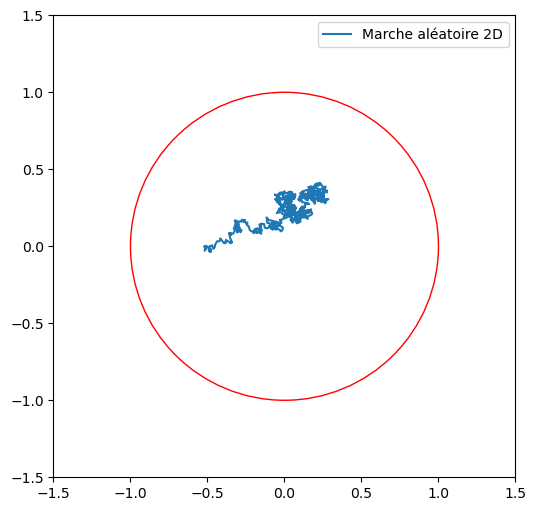

In [79]:
# Paramètres
niter = 1000
x0 = (0.2, 0.4)
step = 0.01
rng = np.random.default_rng(seed=42)
x_vals, y_vals, equation= brownian_motion(niter, x0, step, rng)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_vals[:-1], y_vals[:-1], label='Marche aléatoire 2D')

if np.sqrt(x_vals[-1]**2 + y_vals[-1]**2) > 1:
    ax.plot(x_vals[-2:], y_vals[-2:], 'r', label='Last segment')
    ax.scatter(x_vals[-2], y_vals[-2], color='r', label='point crossing the circle')
    #ax.plot(x_vals[-2:0], y_vals[-2:0], 'ro', label='Dernier point')

circle=plt.Circle((0,0),1,color='r',fill=False)
ax.add_artist(circle)

ax.set_aspect('equal')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

plt.legend()
plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

/var/folders/s3/w3_938yj6mb4c7_8trrtc56h0000gn/T/ipykernel_77230/2353347214.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


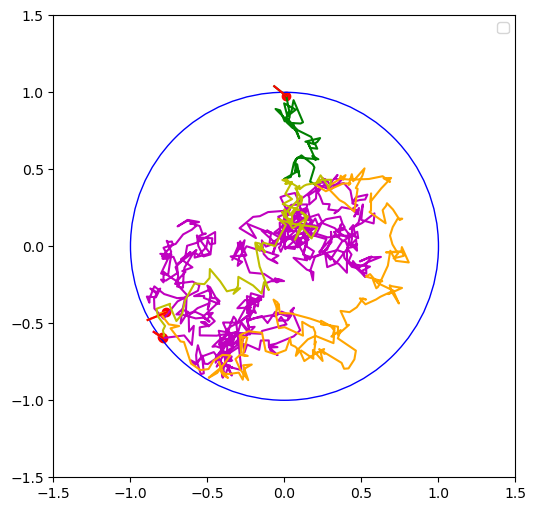

In [80]:
# Paramètres
niter = 1000
x0 = (0.2, 0.4)
step = 0.05
rng = np.random.default_rng(seed=42)

fig, ax = plt.subplots(figsize=(6, 6))

# Dictionnaire de couleurs corrigé
color = {0: 'm', 1: 'g', 2: 'orange', 3: 'y'}

for i in range(4):
    # Simuler la marche aléatoire
    x_vals, y_vals, equation = brownian_motion(niter, x0, step, rng)

    # Tracer la trajectoire en utilisant une couleur différente
    ax.plot(x_vals, y_vals, color=color[i])

    # Vérifier si la particule a franchi le cercle
    if np.sqrt(x_vals[-1]**2 + y_vals[-1]**2) > 1:
        # Tracer en rouge le dernier segment si dépassement du cercle
        ax.plot(x_vals[-2:], y_vals[-2:], 'r')
        ax.scatter(x_vals[-2], y_vals[-2], color='r')

# Ajouter le cercle avec un rayon de 1
circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circle)

# Ajuster l'aspect et les limites des axes
ax.set_aspect('equal')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Afficher la légende
plt.legend()
plt.show()


5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [ ]:
def brownian_motion_M(niter, x0, step, rng, M):

    x = [np.array(x0)]
    n = 0

    while n < niter and np.linalg.norm(x[-1]) < 1:

        step_vector = rgn.normal(0, step, size=M)
        x = x[-1] + step_vector
        n+=1

    return np.array(x)


---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

In [ ]:
# your code

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

In [ ]:
# your code

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [ ]:
# your code

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

In [ ]:
# your code